### **Task 1: Exploring and Visualizing a Dataset**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("movies_metadata.csv")
data.info()

C:\Users\shino\AppData\Local\Temp\ipykernel_9548\2712444636.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("movies_metadata.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [8]:
data.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [9]:
missing_values = data.isnull().sum()
print(missing_values)

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


In [10]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

### **Removed all the Duplicates & Null Values from the data**

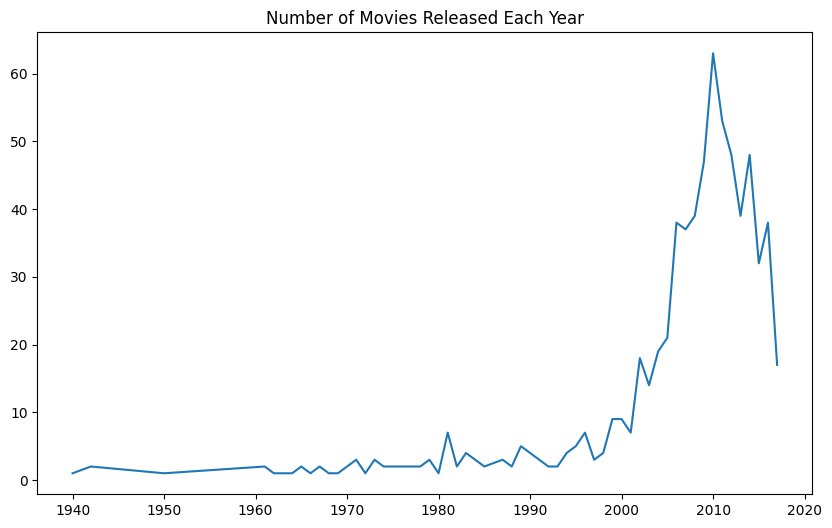

In [11]:
data['release_date']=pd.to_datetime(data['release_date'])
data['year']=data['release_date'].dt.year

movies_per_year =data['year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.lineplot(x=movies_per_year.index,y=movies_per_year.values)
plt.title('Number of Movies Released Each Year')
plt.show()

### **Lineplot for visualizing the Number of Movies Released Each Year**

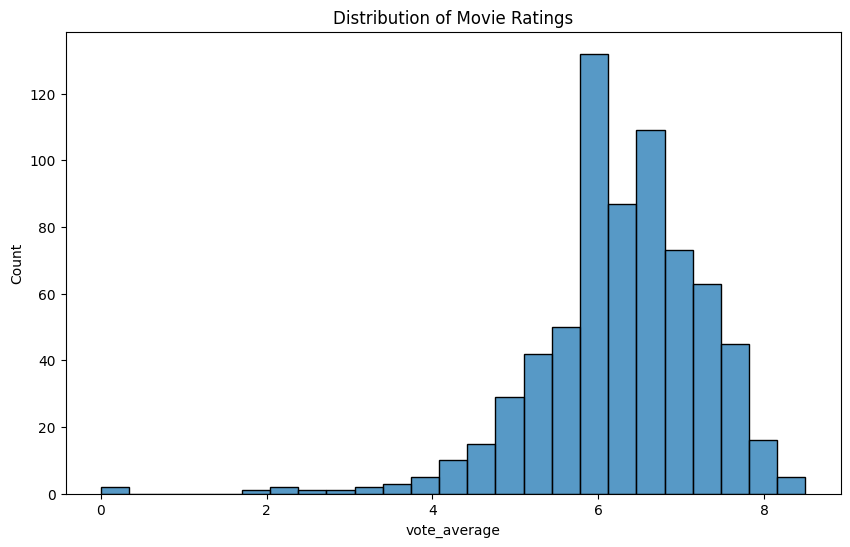

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(data['vote_average'],bins=25)
plt.title('Distribution of Movie Ratings')
plt.show()

### **Histogram to visualize the distribution of movie ratings**

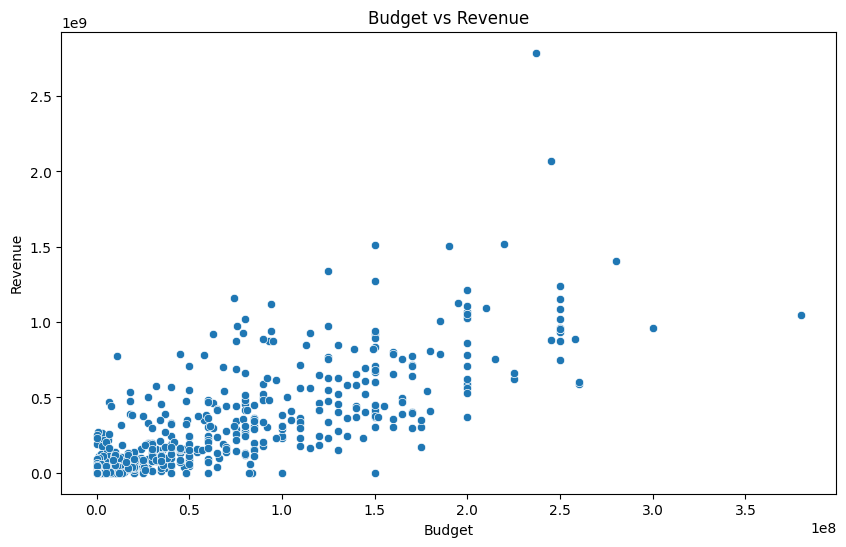

In [30]:
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')

plt.figure(figsize=(10,6))
sns.scatterplot(x='budget', y='revenue', data=data)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

### **Scatter plot that visualizes the relationship between movie Budgets and Revenues**

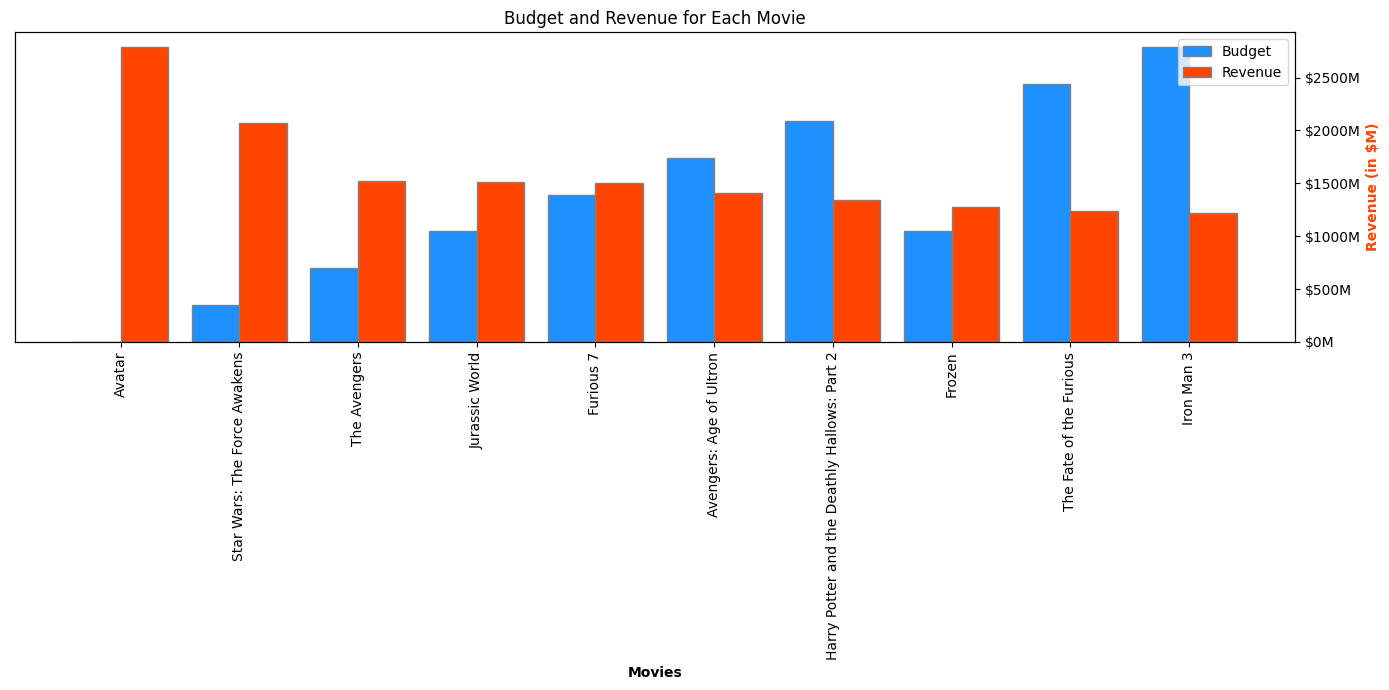

In [40]:
import matplotlib.ticker as ticker
top10 = data.sort_values('revenue', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(14, 7))

bar_width = 0.4 

r1 = np.arange(len(top10))
r2 = [x + bar_width for x in r1]

ax1.bar(r1, top10['budget'], color='dodgerblue', width=bar_width, edgecolor='grey', label='Budget')

ax1.set_xlabel('Movies', fontweight='bold')
ax1.set_xticks([r + bar_width / 2 for r in range(len(top10))])
ax1.set_xticklabels(top10['title'], rotation=90, fontsize=10)

ax2 = ax1.twinx()
ax2.bar(r2, top10['revenue'], color='orangered', width=bar_width, edgecolor='grey', label='Revenue')

ax1.yaxis.set_major_locator(plt.NullLocator())
ax1.yaxis.set_major_formatter(plt.NullFormatter())

ax2.set_ylabel('Revenue (in $M)', color='orangered', fontweight='bold')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

formatter = ticker.FuncFormatter(lambda x, pos: f'${x/1e6:.0f}M')
ax2.yaxis.set_major_formatter(formatter)

plt.title('Budget and Revenue for Each Movie')
plt.tight_layout()
plt.show()


### **Bar chart showing the Budgets and Revenues of the Top 10 movies with the highest revenue**

In [14]:
data_2000 = data[data['year'] >= 2000].copy()

data_2000['revenue_million'] = (data_2000['revenue'] / 1e6)
best_performing_2000 = data_2000.loc[data_2000.groupby('year')['revenue_million'].idxmax()]
print(best_performing_2000[['year', 'title', 'revenue_million']])

       year                                          title  revenue_million
3501   2000                         Mission: Impossible II       546.388105
4766   2001       Harry Potter and the Philosopher's Stone       976.475550
5814   2002          The Lord of the Rings: The Two Towers       926.287400
7000   2003  The Lord of the Rings: The Return of the King      1118.888979
7717   2004                                        Shrek 2       919.838758
10554  2005            Harry Potter and the Goblet of Fire       895.921036
11008  2006     Pirates of the Caribbean: Dead Man's Chest      1065.659812
11827  2007       Pirates of the Caribbean: At World's End       961.000000
12481  2008                                The Dark Knight      1004.558444
14551  2009                                         Avatar      2787.965087
15348  2010                                    Toy Story 3      1066.969703
17437  2011   Harry Potter and the Deathly Hallows: Part 2      1342.000000
17818  2012 

### **Best-Performing movie for each year from year 2000  (Revenue in millions)**

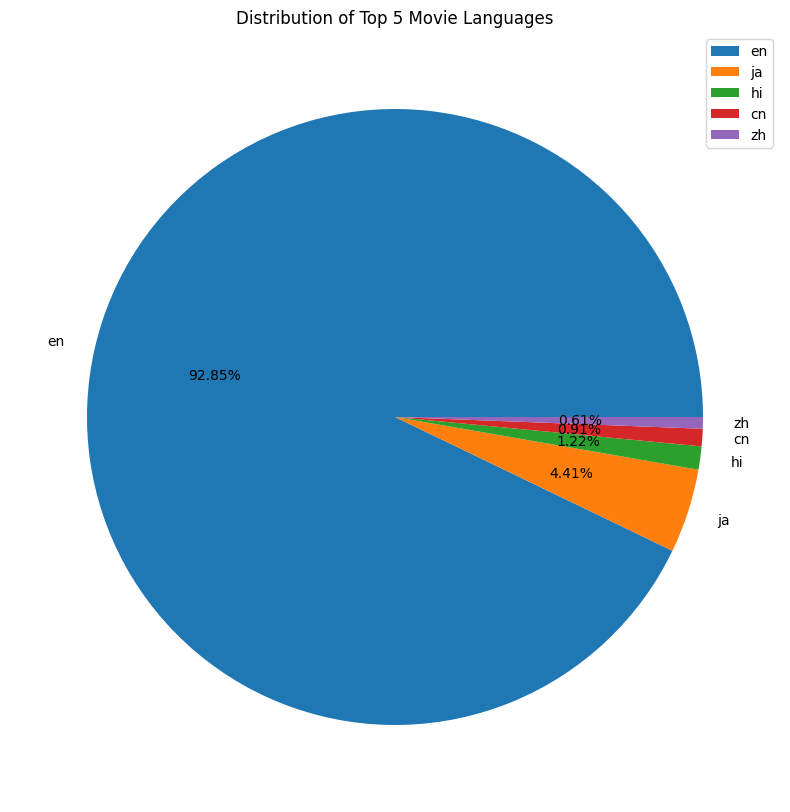

In [101]:
top_languages = data['original_language'].value_counts().head(5)

plt.figure(figsize=(10,10))
plt.pie(top_languages, labels=top_languages.index, autopct='%1.2f%%')
plt.title('Distribution of Top 5 Movie Languages')

language_full_forms = {'EN': 'English','JA': 'Japanese','HI': 'Hindi','CN': 'Chinese','ZH': 'Chinese'}
plt.legend([language_full_forms.get(lang, lang) for lang in top_languages.index])

plt.show()


### **Pie Chart to visualize the distribution of the top 5 movie languages in the dataset**

C:\Users\shino\AppData\Local\Temp\ipykernel_7524\1589185844.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat= data[numeric_columns].corr()


<function matplotlib.pyplot.show(close=None, block=None)>

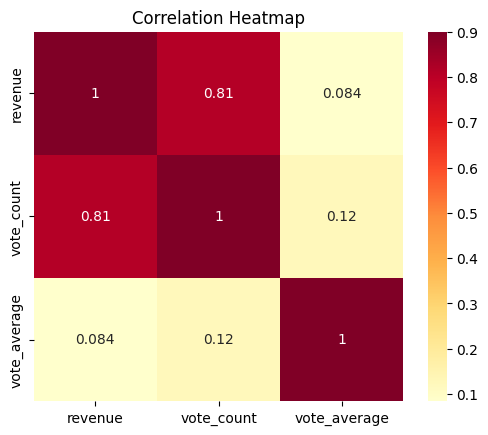

In [143]:
numeric_columns = ['budget', 'popularity', 'revenue', 'vote_count', 'vote_average']
corrmat= data[numeric_columns].corr()
sns.heatmap(corrmat , vmax=.9, square=True,annot=True, cmap="YlOrRd")
plt.title("Correlation Heatmap")
plt.show

### **Heatmap to visualize the correlation between numeric columns in the dataset**